# classify the Size_Categorie using SVM

## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

## Import the dataset 

In [2]:
data = pd.read_csv('forestfires.csv')
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


## EDA 

In [3]:
#Summary of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [4]:
#Checking the null values in dataset
data.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [5]:
#Checking the duplicate values/rows in dataset
data[data.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [6]:
#dropping duplicated rows
data.drop_duplicates(inplace=True)

In [7]:
#dropping unnecessary columns
data.drop(data.columns[11:30], axis=1, inplace=True)
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [8]:
data.shape

(509, 12)

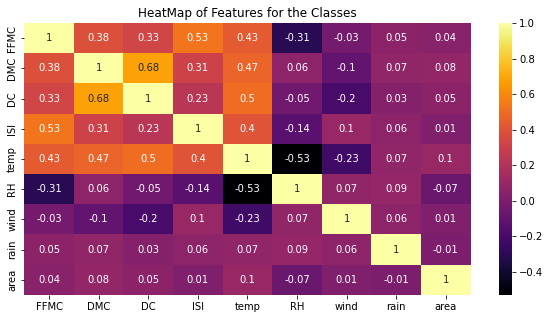

In [9]:
#Plotting heatmap for features
plt.figure(figsize=(10,5))
sns.heatmap(data.corr().round(2), annot=True, cmap="inferno")
ax = plt.gca()
ax.set_title("HeatMap of Features for the Classes")
plt.show()

In [10]:
data.size_category.value_counts()

small    371
large    138
Name: size_category, dtype: int64

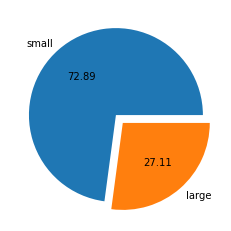

In [11]:
#Visualizing size_category
plt.pie(x=data.size_category.value_counts(), autopct='%0.2f', labels=['small', 'large'], explode=(0.0,0.12))
plt.show()

In [12]:
# Checking for which value of area is categorised into large and small by creating crosstab between area and size_category
pd.crosstab(data.area, data.size_category)

size_category,large,small
area,,
0.00,0,240
0.09,0,1
0.17,0,1
0.21,0,1
0.24,0,1
...,...,...
200.94,1,0
212.88,1,0
278.53,1,0


In [13]:
# Encoding month and day features

data.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),
                           (1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
data.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


## Splitting the dataset 

In [14]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [15]:
X.shape, y.shape

((509, 11), (509,))

## Encoding the target variable

In [16]:
le = LabelEncoder()
y = le.fit_transform(y)

In [17]:
np.unique(y)  #1 - small, 0- large

array([0, 1])

## Model Building 

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, stratify=y, random_state=12)

In [19]:
X_train.shape, X_test.shape

((335, 11), (174, 11))

In [20]:
y_train.shape, y_test.shape

((335,), (174,))

## Feature Scaling

In [21]:
sc      = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.fit_transform(X_test)

## Model Training & Evaluation 

In [22]:
model = SVC(random_state=12, C=1.0, kernel='rbf')

In [23]:
model.fit(X_train, y_train)

SVC(random_state=12)

In [24]:
y_pred_train = model.predict(X_train)

In [25]:
accuracy_score(y_train, y_pred_train)

0.7880597014925373

In [26]:
confusion_matrix(y_train, y_pred_train) 

array([[ 20,  71],
       [  0, 244]], dtype=int64)

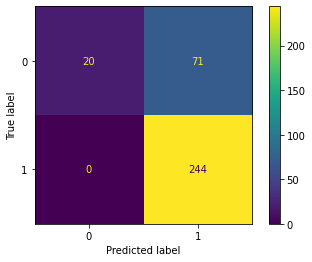

In [27]:
plot_confusion_matrix(model, X_train, y_train)
plt.show()

In [28]:
print(classification_report(y_train, y_pred_train))  

              precision    recall  f1-score   support

           0       1.00      0.22      0.36        91
           1       0.77      1.00      0.87       244

    accuracy                           0.79       335
   macro avg       0.89      0.61      0.62       335
weighted avg       0.84      0.79      0.73       335



## Model Testing & Evaluation 

In [29]:
y_pred_test = model.predict(X_test)

In [30]:
accuracy_score(y_test, y_pred_test)

0.8505747126436781

In [31]:
confusion_matrix(y_test, y_pred_test)

array([[ 21,  26],
       [  0, 127]], dtype=int64)

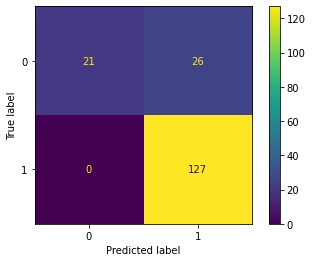

In [32]:
plot_confusion_matrix(model, X_test, y_test)
plt.show()

In [33]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.45      0.62        47
           1       0.83      1.00      0.91       127

    accuracy                           0.85       174
   macro avg       0.92      0.72      0.76       174
weighted avg       0.88      0.85      0.83       174



### From above model, class 0 (large_size) is misclassified even though accuracy is good. We will try tweaking the hyper-parameteres.

## Building Model with Hyper-parameters

In [34]:
model2 = SVC(C=1, kernel='rbf', random_state=12, gamma=15, class_weight={0:2.68 , 1:1})

In [35]:
model2.fit(X_train, y_train)

SVC(C=1, class_weight={0: 2.68, 1: 1}, gamma=15, random_state=12)

In [36]:
y_pred_test = model2.predict(X_test)

In [37]:
accuracy_score(y_test, y_pred_test)

0.7298850574712644

In [38]:
confusion_matrix(y_test, y_pred_test)

array([[  0,  47],
       [  0, 127]], dtype=int64)

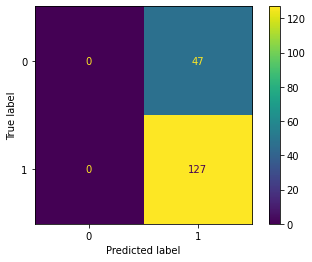

In [39]:
plot_confusion_matrix(model2, X_test, y_test)
plt.show()

## Building model with Grid Search CV

In [40]:
model3 = SVC(random_state=12, class_weight={0:2.68 , 1:1})

In [41]:
param_grid = [{'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]

gd = GridSearchCV(model3, param_grid, cv=10)

gd.fit(X_train, y_train)


GridSearchCV(cv=10,
             estimator=SVC(class_weight={0: 2.68, 1: 1}, random_state=12),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5],
                          'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}])

In [42]:
gd.best_estimator_

SVC(C=15, class_weight={0: 2.68, 1: 1}, gamma=50, kernel='linear',
    random_state=12)

In [43]:
gd.best_score_

0.9759358288770054

### It seems, accuracy has improved a lot with grid search cv. Let's try to build the final model using above resulted hyper-parameters.

## Building Final Model for the dataset

In [44]:
model4 = SVC(C=15, class_weight={0: 2.68, 1: 1}, gamma=50, kernel='linear',
    random_state=12)

In [45]:
model4.fit(X_train, y_train)

SVC(C=15, class_weight={0: 2.68, 1: 1}, gamma=50, kernel='linear',
    random_state=12)

In [46]:
y_pred_test = model4.predict(X_test)

In [47]:
accuracy_score(y_test, y_pred_test)

0.9885057471264368

In [48]:
confusion_matrix(y_test, y_pred_test)

array([[ 47,   0],
       [  2, 125]], dtype=int64)

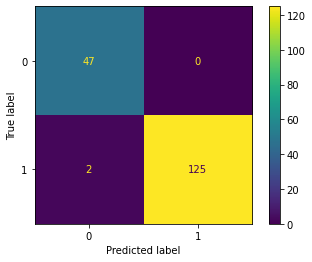

In [49]:
plot_confusion_matrix(model4, X_test, y_test)
plt.show()

In [50]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        47
           1       1.00      0.98      0.99       127

    accuracy                           0.99       174
   macro avg       0.98      0.99      0.99       174
weighted avg       0.99      0.99      0.99       174



### Conclusion:
**Hence, we can conclude that model4 accuracy has improved a lot. Also, the misclassification for minority class 0 (large_size) has reduced. We can consider above model4 for the dataset.**

### =================================================================== 